# Gradient Ascent in a Complex Landscape

This is optional coursework from the class in Mathematics and Computation Methods for Complex Systems (MCMCS) at the University of Sussex.

Parts of the code is built by Professor Luc Berthouze with gaps in the code that is filled by the student (me, Joakim Torsvik)

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

C:\Users\JOAKIM~1\AppData\Local\Temp/ipykernel_15452/2597167016.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


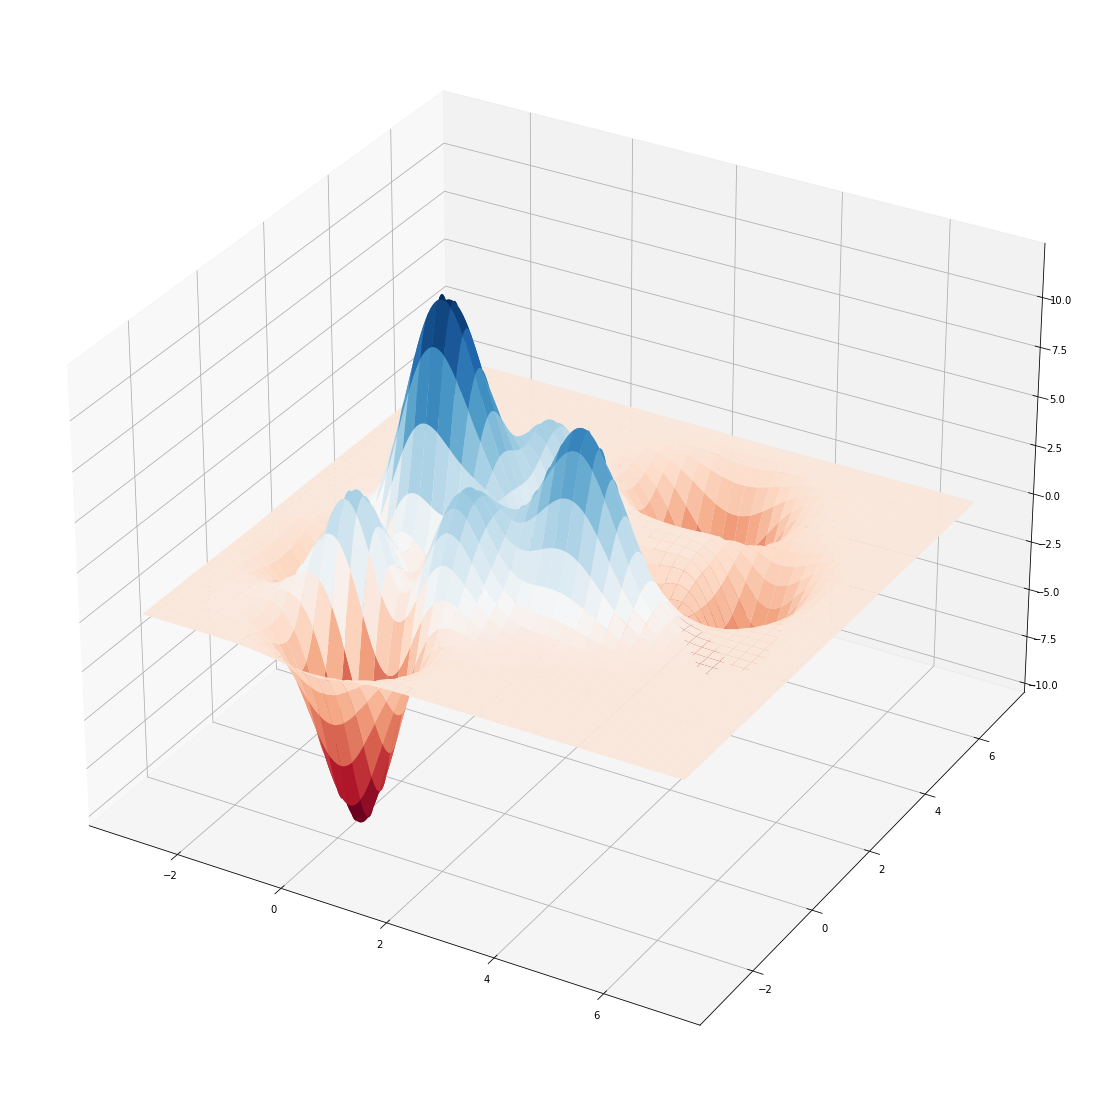

(False, 499, 4.850151561270008)

In [2]:
# Definition of Complex landscape
def ComplexLandscape(x, y):
    return 4*(1-x)**2*np.exp(-(x**2)-(y+1)**2) -15*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) -(1./3)*np.exp(-(x+1)**2 - y**2)-1*(2*(x-3)**7 -0.3*(y-4)**5+(y-3)**9)*np.exp(-(x-3)**2-(y-3)**2)

# Definition of gradient of Complex landscape
def ComplexLandscapeGrad(x, y):
    g = np.zeros(2)
    g[0] = -8 * np.exp(-(x**2) - (y+1)**2) * ((1-x) + x * (1-x)**2) - 15 *  np.exp(-x**2 - y**2) * ((0.2 - 3 * x**2) -2 * x * (x/5 - x**3 - y**5)) +(2./3) * (x+1) * np.exp(-(x+1)**2 - y**2) - 1 * np.exp(-(x-3)**2 - (y-3)**2) * (14 * (x-3)**6 - 2 * (x-3) * (2 * (x-3)**7 - 0.3 * (y-4)**5 + (y-3)**9))
    g[1] = -8 * (y+1) * (1-x)**2 * np.exp(-(x**2) - (y+1)**2) -15 * np.exp(-x**2 - y**2) * (-5 * y**4 -2 * y * (x/5 - x**3 - y**5)) +(2./3) * y * np.exp(-(x+1)**2 - y**2) - 1 *  np.exp(-(x-3)**2-(y-3)**2) * ((-1.5 * (y-4)**4 + 9 * (y-3)**8) - 2 * (y-3) * (2 * (x-3)**7 - 0.3 * (y-4)**5 + (y-3)**9))
    return g


# Function to draw a surface (equivalent to ezmesh in Matlab)
# See argument cmap of plot_surface instruction to adjust color map (if so desired)
def DrawSurface(fig, varxrange, varyrange, function):
    
    """Function to draw a surface given x,y ranges and a function."""
    
    ax = fig.gca(projection='3d')
    xx, yy = np.meshgrid(varxrange, varyrange, sparse=False)
    z = function(xx, yy)
    ax.plot_surface(xx, yy, z, cmap='RdBu') # color map can be adjusted, or removed!
    fig.canvas.draw()
    return ax


# Function implementing gradient ascent
def GradAscent(StartPt,NumSteps,LRate, new_height):
    
    for i in range(NumSteps):
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape
        height = ComplexLandscape(StartPt[0], StartPt[1])
        
        # TO DO: Plot point on the landscape
        # Use a markersize that you can see well enough (e.g., * in size 10)
        plt.plot(StartPt[0], StartPt[1],height, c='g', markersize= 20) 
        plt.show()
        # TO DO: Calculate the gradient at StartPt using SimpleLandscapeGrad or ComplexLandscapeGrad
        gradient = ComplexLandscapeGrad(StartPt[0], StartPt[1])
        # TO DO: Calculate the new point and update StartPt

        StartPt = StartPt + LRate * gradient

        New_height = ComplexLandscape(StartPt[0],StartPt[1])
        
        # Ensure StartPt is within the specified bounds (un/comment relevant lines)

        StartPt = np.maximum(StartPt,[-3,-3])
        StartPt = np.minimum(StartPt,[7,7])


        if new_height >= max_height:
            return True, i, new_height
        elif i == (NumSteps - 1):
            return False, i, new_height




# TO DO: Mutation function
# Returns a mutated point given the old point and the range of mutation
def Mutate(OldPt, MaxMutate):
    # TO DO: Select a random distance MutDist to mutate in the range (-MaxMutate,MaxMutate)
    MutDist = np.random.uniform(-MaxMutate, MaxMutate)

    index = np.random.randint(0, len(OldPt))
    # print('*** OldPt = {},MutDist = {}'.format(OldPt,MutDist))
    OldPt[index] = OldPt[index] + MutDist

    MutatedPt =  OldPt
    # print("**** MutatedPt =",MutatedPt)

    # TO DO: Randomly choose which element of OldPt to mutate and mutate by MutDist

    return MutatedPt

    

# Function implementing hill climbing
def HillClimb(StartPt, NumSteps, MaxMutate, max_height):

    for i in range(NumSteps):
        
        # TO DO: Calculate the 'height' at StartPt using SimpleLandscape or ComplexLandscape

        start_height = ComplexLandscape(StartPt[0], StartPt[1])

        # TO DO: Plot point on the landscape
        # Use a markersize that you can see well enough (e.g., * in size 10)
        ax.plot(StartPt[0], StartPt[1] , start_height, c='g', markersize= 20)  # o for disk and r for red
        plt.show()

        # Mutate StartPt into NewPt
        NewPt = Mutate(np.copy(StartPt),
                       MaxMutate)  # Use copy because Python passes variables by references (see Mutate function)

        # Ensure NewPt is within the specified bounds (un/comment relevant lines)
        NewPt = np.maximum(NewPt,[-3,-3])
        NewPt = np.minimum(NewPt,[7,7])

        # TO DO: Calculate the height of the new point

        new_height = ComplexLandscape(NewPt[0], NewPt[1])

        # TO DO: Decide whether to update StartPt or not

        # print(f"HillClimb New height = {new_height}, NewStartPoint = {NewPt}")

        if new_height > start_height:
            StartPt = NewPt

            start_height = new_height

        if new_height >= max_height:
            return True, i, new_height
        elif i == (NumSteps - 1):
            return False, i, new_height



# Template
# Plot the landscape (un/comment relevant line)
plt.ion()
fig = plt.figure(figsize=(20, 20))
ax = DrawSurface(fig, np.arange(-3, 7.025, 0.025), np.arange(-3, 7.025, 0.025), ComplexLandscape)

# Enter maximum number of iterations of the algorithm, learning rate and mutation range
NumSteps = 500
LRate = 1
MaxMutate = 1

def StopCondition(NewHeight, OldHeight):

    if(np.abs(NewHeight - OldHeight)) < 0.0001:
        return True
    else:
        return False

# TO DO: choose a random starting point with x and y in the range (-2, 2) for simple landscape, (-3,7) for complex landscape

x = random.uniform(-3, 7)
y = random.uniform(-3, 7)
StartPt = np.array([x,y])
max_height = 10

# Find maximum (un/comment relevant line)
GradAscent(StartPt, NumSteps, LRate, max_height)
HillClimb(StartPt, NumSteps, MaxMutate, max_height)